 # **Relatório de Análise do Desempenho de Turbinas Eólicas**
---
**Resumo Executivo**

Este relatório apresenta uma análise dos dados de registros da potência de energia que as Turbinas de Energia Eólica produziram de 01/01/2018 até 31/12/2018. O objetivo é examinar as medições e verificar se o desempenho das turbinas está de acordo com o esperado ou se há algum possível problema.

**Bibliotecas Utilizadas:**

* **Pandas:** Biblioteca para edição e visualização dos dados em forma de tabela, como convenção ela será apelidada de **'pd'** para o seu uso no código.
* **Matplotlib:** Biblioteca de vizualização dos dados em forma de gráfico (plot), dessa biblioteca usaremos apenas as funções do pyplot, que como convenção ela será apelidada de **'plt'** para o seu uso no código.
* **Seaborn:** Evolução do matplotlib para visualização estátisticas dos dados com plot, como convenção ela será apelidada de **'sns'** para o seu uso no código.
* **AdjustText:** Biblioteca para ajustar as legendas dos gráficos para que elas não se sobreponham.

In [2]:
#Importação das bibliotecas citadas e suas principais funções com seus
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from adjustText import adjust_text

## **1. Carregar Arquivo**
---

#### Começando por ler o arquivo T1.csv, que possue o seguinte resumo de colunas:
* **Registro:** A data e hora do registro da Potência da Turbina
* **Potência (kW):** Potência registrada da Turbina
* **Vento (m/s):** Velocidade do vento durante o registro
* **Curva_Teórica (KWh):** Potência ideal da turbina pela velocidade do tempo

Não usarei a coluna **'Direção_Vento'** nesta análise, pois ela não é necessária. Isso visando que a turbina gira em direção ao vento. Se houver algum defeito em seu sensor de rotação, a direção em que ela está virada não consegue me dizer se é esse o problema, uma vez que não existem informações específicas sobre a turbina em questão

In [3]:
Energia = pd.read_csv('T1.csv')
Energia.columns = ['Registro', 'Potência (kW)', 'Vento (m/s)', 'Curva_Teórica (KWh)', 'Direção_Vento (°)']
#Energia.drop(columns='Direção_Vento (°)', inplace=True)
Energia['Registro'] = pd.to_datetime(Energia['Registro'])
display(Energia)

,Registro,Potência (kW),Vento (m/s),Curva_Teórica (KWh),Direção_Vento (°)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,84.297913


Foi necessário ajuste nos dados da coluna **Registro** para correta utilização dos dados, os demais parecem estar corretos mas para ter certeza é necessário fazer uma Análise Exploratória


## **2. Análise Exploratória de Dados (EDA)**
---
Agora vou verificar a qualidade dos dados para saber se há algum problema e ter uma análise básica do seu conteúdo.

### **2.1 Resumo Estatístico**
---
Obter resumo estatístico, com as principais métricas desse Dataframe

In [4]:
Energia.describe()

,Potência (kW),Vento (m/s),Curva_Teórica (KWh),Direção_Vento (°)
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


### **2.2 Valores Vazios**
---
Verificando se há valores faltando, vazios ou duplicados.

In [5]:
display(Energia.isnull().sum())
display(Energia.duplicated().sum())

Registro               0
Potência (kW)          0
Vento (m/s)            0
Curva_Teórica (KWh)    0
Direção_Vento (°)      0
dtype: int64

0

### **2.3 Primeira Visualização**
---
Vou plotar os dados da Potência pelo Vento registrados através de um gráfico de dispersão, pois ele será o ideal para poder ver como os valores estão se distribuindo.

Text(0.5, 1.0, 'Dispersão dos Registros')

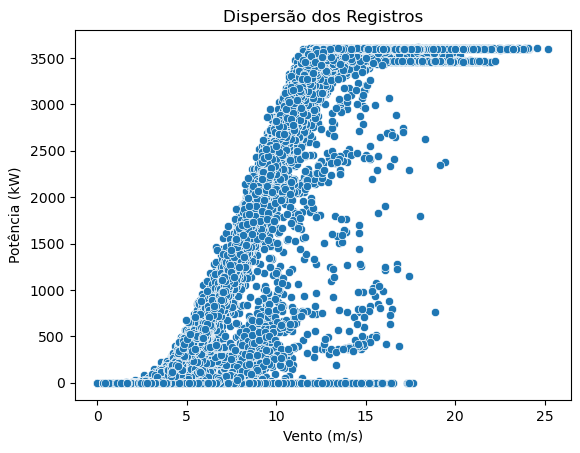

In [6]:
sns.scatterplot(data=Energia, x='Vento (m/s)', y='Potência (kW)')
plt.title('Dispersão dos Registros')

### **2.4 Curva Ideal**
---
Agora vou criar o mesmo gráfico de dispersão só que com a coluna Curva_Teórica pelo Vento, para ver de que forma o gráfico seria se não houvesse nenhum problema com as Turbinas e elas produzissem a Energia esperada.

Text(0.5, 1.0, 'Dispersão Ideal de Energia')

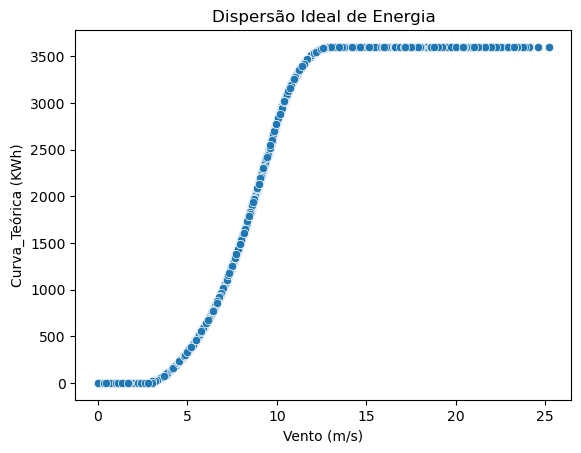

In [7]:
sns.scatterplot(data=Energia, x='Vento (m/s)', y='Curva_Teórica (KWh)')
plt.title('Dispersão Ideal de Energia')

## **3. Insights de Análise**
---
Após as primeiras Análises vou retirar minhas primeiras conclusões e melhorar os dados afim de as conferir para dimensionar o tamanho dos problemas

### **3.1 Desempenho das Turbinas**
---
Com base nos dois gráficos é possível notar que o gráfico da Dispersão dos Registros mesmo que cresça de forma parecida com a Dispersão Ideal, ainda possue muitos pontos muito fora do ideal

### **3.2 Determinar um Limite**
---
Para quantificar quantas turbinas estão apresentando medição inadequada, vou definir oque seria uma medição adequada estabelecendo um limite, que será de 5% para cima e 10% para baixo, qualquer medição fora desse limite está fora do desemepnho desejado.

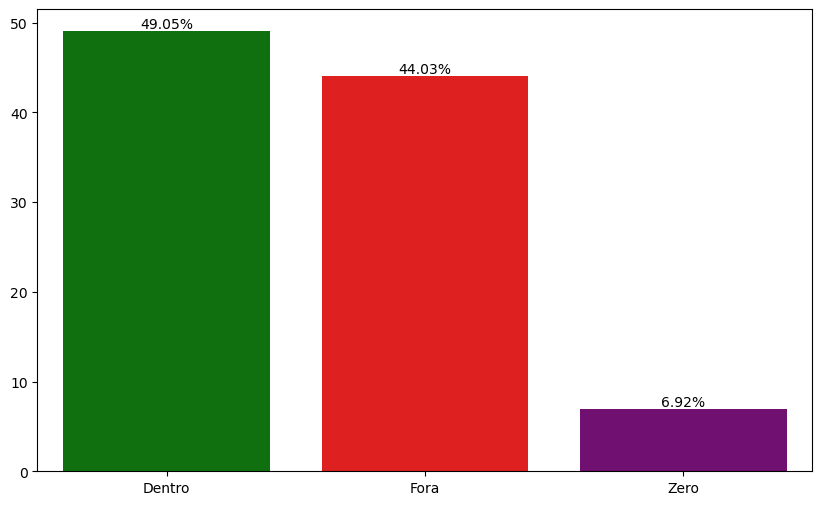

In [8]:
#criação da coluna DentroLim
pot_real = Energia['Potência (kW)'].to_list()
pot_teorica = Energia['Curva_Teórica (KWh)'].to_list()
pot_max = [pot * 1.05 for pot in pot_teorica]
pot_min = [pot * 0.9 for pot in pot_teorica]
dentro_lim = ['Dentro' if pot_max[p]>=pot>=pot_min[p] 
              else 'Zero' if pot==0 
              else 'Fora' 
              for p, pot in enumerate(pot_real)]
Energia['DentroLim'] = dentro_lim

#Plot dos dados  da coluna
figure(figsize=(10, 6))
Porcentagem = Energia['DentroLim'].value_counts()/len(Energia) * 100
cores = {'Dentro': 'Green', 'Fora': 'Red', 'Zero': 'Purple'}
ax = sns.barplot(data=Energia, x=Porcentagem.index, y=Porcentagem.values, palette=cores)
porcent = ["{:.2f}%".format(valor) for valor in ax.containers[0].datavalues]
ax = ax.bar_label(ax.containers[0], labels=porcent)

**Anáise dos dados do limite**

Após a delimitação do que é aceitável, é possível ver pelo gráfico de barras que 49,05% das medições estão fora do esperado sendo 44,03% muito acima ou muito abaixo e 6,92% estão zeradas. Algo que representa uma taxa de ineficiência muito grande das turbinas, sendo acima do esperado.

### **3.3 Criando o gráfico novamente**
---
Vou refazer o primeiro gráfico de dispersão agora usando a coluna **DentroLim** como legenda, para visualisar o gráfico novamente e ter uma representão dos dados individuais pela velocidade do vento demonstrados pelo gráfico anterior.

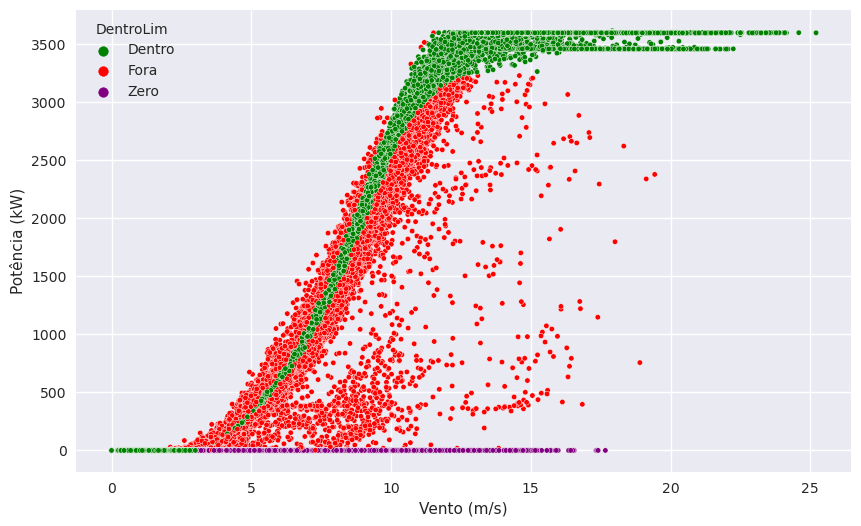

In [9]:
#Gráfico de dispersão com legenda
with plt.style.context('seaborn-v0_8'):
    figure(figsize=(10, 6))
    grafico = sns.scatterplot(data=Energia, x='Vento (m/s)', y='Potência (kW)', hue='DentroLim',s=15, palette=cores)

**Análise do Gráfico de Dispersão**

Por meio do gráfico é possivel ver que os valores fora do limite se apresentam em maior quantidade de forma inferior a produção esperada, mesmo assim ainda há muitos valores acima do esperado. Tambem é possivel notar que os valores de produção zerada se estendem até cerca de 18 m/s, oque pode sugerir uma possivel época do ano na qual os valores ficaram zerados independente da velocidade do vento, ou que haver valores zerados é comum até certo ponto.

### **3.4 Análise Mensal dos Dados**
---
Como as medições foram feitas de 10 em 10 minutos durante o ano todo, podemos procurar uma fonte das medições fora do padrão, fazendo um filtro por **Mês** e pelas classificações de Limite (**DentroLim**)

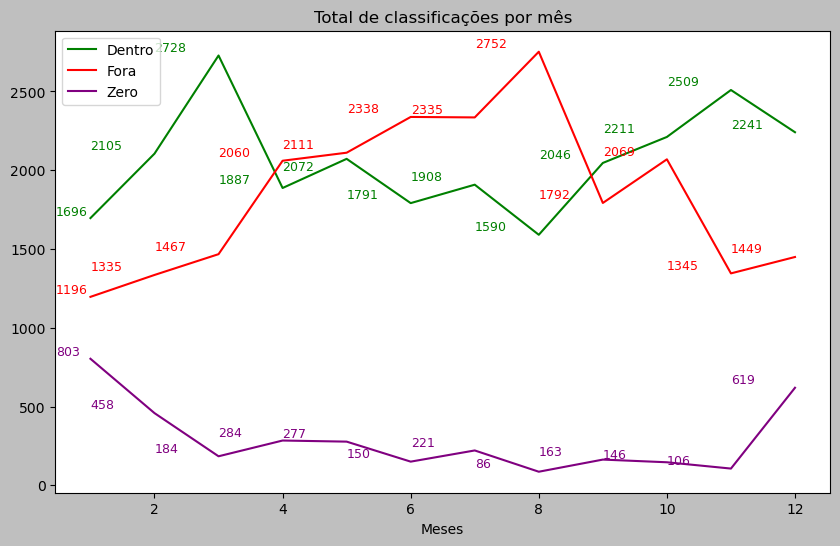

In [10]:
#Extraindo os Dados de mês da coluna Registro na coluna Mês
Energia['Mês'] = Energia.Registro.dt.month

#Agrupando e contando os dados por mês e classificação
group = Energia.groupby(['Mês', 'DentroLim']).size().unstack(fill_value=0)

#Criando um gráfico de linhas para o agrupamento.

with plt.style.context('grayscale'):
    figure(figsize=(10, 6), )
    for clas in group.columns:
        plt.plot(group.index, group[clas], label=clas, color=cores.get(clas, 'black'))

    #Rótulos, Estilo e titulo
    plt.xlabel('Meses')
    plt.legend('Total por Classificação')
    plt.title('Total de classificações por mês')

    #criando a legenda
    plt.legend()
    texts = []
    for clas in group.columns:
        for mes, quant in enumerate(group[clas]):
            text = plt.text(mes, quant, str(quant), fontsize=9, color=cores.get(clas, 'black'))
            texts.append(text)

    #Ajustando a legenda para que os textos não se sobreponham
    adjust_text(texts, only_move={'points':'y', 'texts':'y'})

    #Visualizando o gráfico
    plt.show()

**Análise dos Dados do Gráfico de linhas**

Após a vizualização dos dados é possivel notar algumas coisa:
* **Aumento do mau desempenho:** A linha vermelha que representa os dados 'FORA' do limite estipulado, apresenta um crescimento constante até seu pico máximo no mês de Agosto, depois declina até o final do ano.
* **Dados zerados apresentam padrão:** Os dados da linha Roxa que apresenta os dados 'Zero' seguem um padrão muito próximo durante a maior parte do ano estando entre 300-80. Apenas no final e começo do ano (Janeiro, Fevereiro e Dezembro) que esses valores saem do padrão atingindo os maiores valores.
* **As linhas de 'Fora' e 'Dentro' são bem voláteis:** Essas duas linhas durante todo o ano não apresentam padrões de valores, a cada mês os valores podem tanto subir quanto descer.

Não consigo dizer qual ano foi o pior em desempenho, pois este gráfico apenas conta a quantidade bruta de cada classificação assim valores extremamente baixos ou extremamentes baixos estão misturados, contudo posso tirar algumas previas conclusões de que o problema pode estar relacionado as estações do ano, devido as épocas especificas do ano como o meio no qual as medições 'FORA' superam as 'DENTRO' e o inicio e final, como citado é a única época onde os valores 'ZERO' saltam do padrão,

### **3.5 Análise do desempenho mensal**
---
Para podermos ter noção do desempenho das turbina durante o ano o ideal é calcular a diferença entre oque foi produzido e oque deveria ter sido produzido para observar se os valores se manifestão da mesma forma que no gráfico anterior. Para tanto calcularei a média de produção por medição já que cada mês não tem a mesma quantidade de medições:

In [11]:
Energia.value_counts('Mês').sort_index()

Mês
1     3695
2     3898
3     4379
4     4231
5     4460
6     4279
7     4464
8     4428
9     4001
10    4426
11    3960
12    4309
dtype: int64

In [12]:
#Criação da coluna de diferença entre a energia real gerada e o esperada
Energia['Diferença'] = Energia['Potência (kW)'] - Energia['Curva_Teórica (KWh)']
Energia.describe()

,Potência (kW),Vento (m/s),Curva_Teórica (KWh),Direção_Vento (°),Mês,Diferença
count,50530.000000,50530.000000,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559,6.565110,-184.491131
std,1312.459242,4.227166,1368.018238,93.443736,3.395372,427.701555
min,-2.471405,0.000000,0.000000,0.000000,1.000000,-3600.000000
25%,50.677890,4.201395,161.328167,49.315437,4.000000,-194.562692
50%,825.838074,7.104594,1063.776283,73.712978,7.000000,-66.682623
75%,2482.507568,10.300020,2964.972462,201.696720,10.000000,0.000000
max,3618.732910,25.206011,3600.000000,359.997589,12.000000,598.741011


DentroLim,Dentro,Fora,Zero,Media Total
Mês,,,,
1,-57.849563,-561.892610,-1718.507559,-581.893908
2,-54.369635,-266.080693,-1290.833422,-272.156879
3,-50.309172,-194.752639,-578.784123,-120.904732
4,-43.893244,-173.417953,-290.983524,-123.542155
5,-56.666299,-195.432792,-856.685082,-172.034297
6,-50.351743,-245.484090,-214.311361,-162.717569
7,-27.432410,-134.690270,-89.799914,-86.623790
8,-75.090496,-251.717982,-59.290827,-184.557540
9,-69.642606,-156.983231,-91.428964,-109.648998


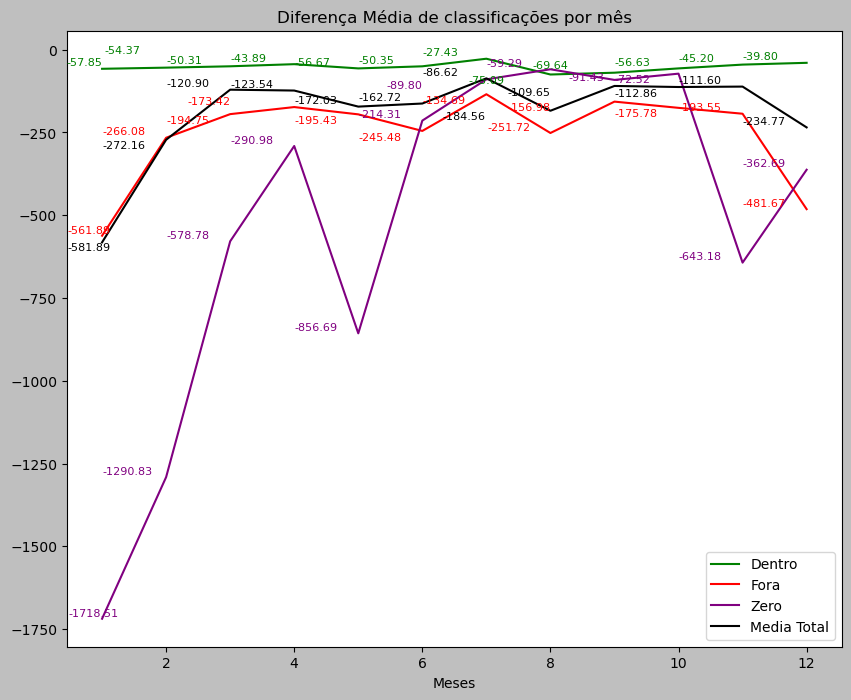

In [18]:
group = Energia.groupby(['Mês', 'DentroLim'])['Diferença'].mean().unstack(fill_value=0)
Media = []
for mes in group.index:
    num = Energia['Diferença'].loc[Energia['Mês']==mes].mean()
    Media.append(num)
group['Media Total'] = Media
group.applymap(lambda x: round(2))
display(group)


with plt.style.context('grayscale'):
    figure(figsize=(10, 8), )
    for clas in group.columns:
        plt.plot(group.index, group[clas], label=clas, color=cores.get(clas, 'black'))

    #Rótulos, Estilo e titulo
    plt.xlabel('Meses')
    plt.legend('Total por Classificação')
    plt.title('Diferença Média de classificações por mês')

    #criando a legenda
    plt.legend()
    texts = []
    for clas in group.columns:
        for mes, quant in enumerate(group[clas]):
            
            text = plt.text(mes, quant, str(f'{quant:.2f}'), fontsize=8, color=cores.get(clas, 'black'))
            texts.append(text)

    #Ajustando a legenda para que os textos não se sobreponham
    adjust_text(texts, only_move={'points':'y', 'texts':'y'})

    #Visualizando o gráfico
    plt.show()

**Análise dos Gráficos**



<Axes: xlabel='Registro', ylabel='Vento (m/s)'>

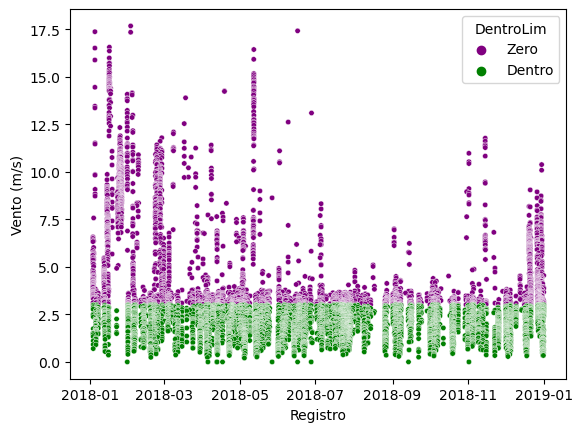

In [15]:
t = Energia.sort_values(by='Vento (m/s)', ascending=False).loc[Energia['Potência (kW)']==0]
f = t.groupby(['Mês', 'Vento (m/s)']).size().unstack(fill_value=0)
sns.scatterplot(data=t, x='Registro', y='Vento (m/s)', hue='DentroLim',s=15, palette=cores)
#display(t)

In [16]:
correlacao = Energia['Potência (kW)'].corr(Energia['Vento (m/s)'])
correlacao

0.9127742911275556

C:\Users\eduar\AppData\Local\Temp\ipykernel_23900\2333161513.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Energia.corr(), cmap='YlOrRd', fmt='.2f', linewidths=0.1, vmax=1.0, square=True, annot=True, linecolor='white');


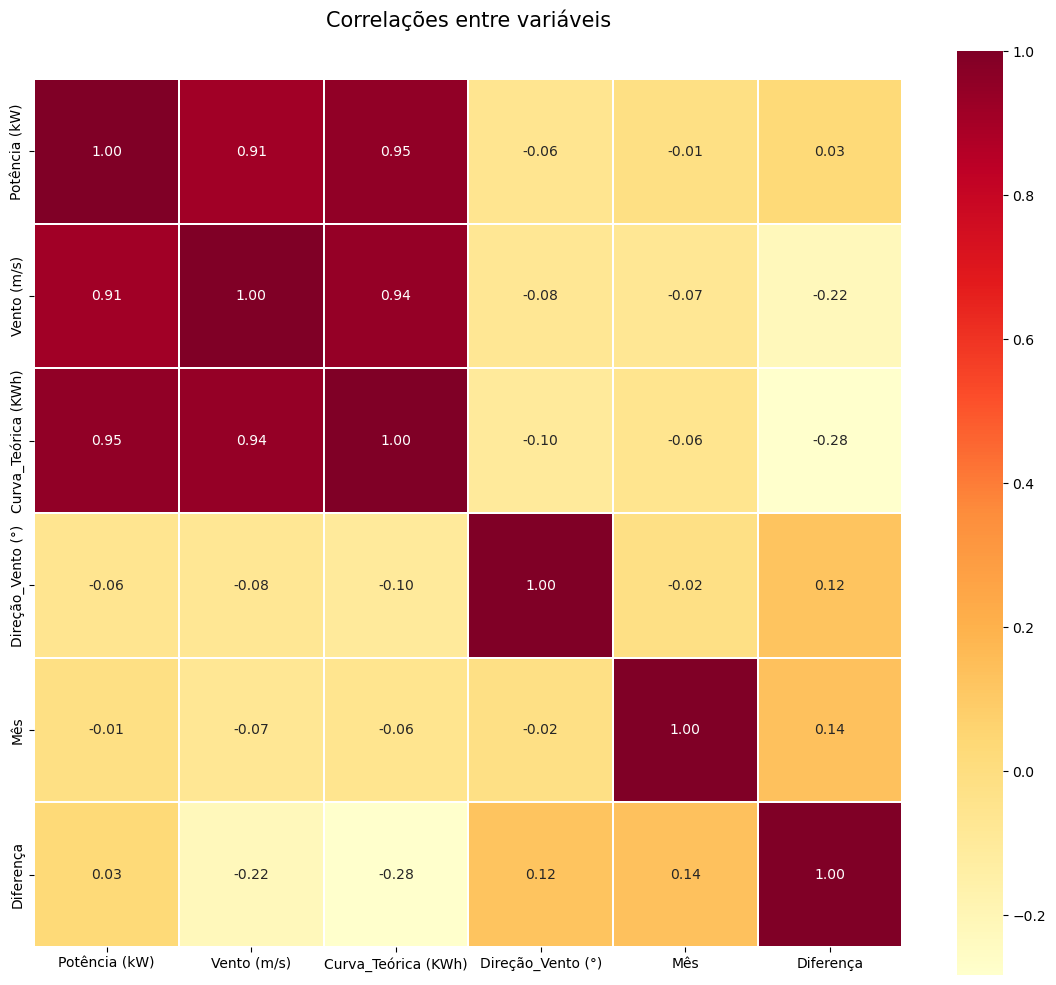

In [17]:
plt.figure(figsize=(14,12))
plt.title('Correlações entre variáveis', y=1.05, size=15)
sns.heatmap(Energia.corr(), cmap='YlOrRd', fmt='.2f', linewidths=0.1, vmax=1.0, square=True, annot=True, linecolor='white');